# Relax Data Science Challenge

The data is available as two attached CSV files:
takehome_user_engagement. csv
takehome_users . csv
The data has the following two tables:
1] A user table ( "takehome_users" ) with data on 12,000 users who signed up for the
product in the last two years. This table includes:
● name: the user's name
● object_id: the user's id
● email: email address
● creation_source: how their account was created. This takes on one
of 5 values:
○ PERSONAL_PROJECTS: invited to join another user's
personal workspace
○ GUEST_INVITE: invited to an organization as a guest
(limited permissions)
○ ORG_INVITE: invited to an organization (as a full member)
○ SIGNUP: signed up via the website
○ SIGNUP_GOOGLE_AUTH: signed up using Google
Authentication (using a Google email account for their login
id)
● creation_time: when they created their account
● last_session_creation_time: unix timestamp of last login
● opted_in_to_mailing_list: whether they have opted into receiving
marketing emails
● enabled_for_marketing_drip: whether they are on the regular
marketing email drip
● org_id: the organization (group of users) they belong to
● invited_by_user_id: which user invited them to join (if applicable).
2] A usage summary table ( "takehome_user_engagement" ) that has a row for each day
that a user logged into the

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sns

## Load the Data

In [144]:
dfuser = pd.read_csv('takehome_users.csv', encoding = 'latin1')

In [145]:
dfusereng = pd.read_csv('takehome_user_engagement.csv', encoding = 'latin1')

In [146]:
dfuser.shape

(12000, 10)

In [147]:
dfuser.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


###  Name: the user's name
* object_id: the user's id
* email: email address
* creation_source: how their account was created. This takes on one of 5 values:
    * PERSONAL_PROJECTS: invited to join another user's personal workspace
    * GUEST_INVITE: invited to an organization as a guest(limited permissions)
    * ORG_INVITE: invited to an organization (as a full member)
    * SIGNUP: signed up via the website
* creation_time: when they created their account
* last_session_creation_time: unix timestamp of last login
* opted_in_to_mailing_list: whether they have opted into receiving marketing emails
* enabled_for_marketing_drip: whether they are on the regular marketing email drip
* org_id: the organization (group of users) they belong to
* invited_by_user_id: which user invited them to join (if applicable).

In [148]:
dfusereng.shape

(207917, 3)

In [149]:
dfusereng.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [150]:
#check how many users and how many logins
print('There were {} users and {} total logins'.format(
    dfusereng['user_id'].nunique(), len(dfusereng)
))

There were 8823 users and 207917 total logins


In [151]:
# convert time_stamp into datetime format
dfusereng['time_stamp'] = pd.to_datetime(
    dfusereng['time_stamp'], format='%Y-%m-%d %H:%M:%S'
)

In [152]:
# define a function to see if a user logged in on 3 seperate days in a 7-day period.

def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    
    # first drop duplicate days and sort by day
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    
    # calculate how many days has passed for every 3 logins
    passed_days = df['date'].diff(periods=logins-1)
    
    # check if any passed time is less than 7 days
    return any(passed_days <= timedelta(days=days))

In [153]:
dfusereng.head(4)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1


In [154]:
# run the function on all users
adopted = dfusereng.groupby('user_id').apply(logins_in_days)
adopted.name = 'adopted_user'

In [155]:
print('There were {} adopted users out of {} users'.format(
    sum(adopted), len(adopted)))

There were 1656 adopted users out of 8823 users


There are 1656 adopted users out of 8823 users, who has who has logged into the product on three separate
days in at least one seven day period.

In [156]:
# read the user data
# some columns such as name, email address are not useful here
# let's not read them
cols = ['object_id', 'creation_source', 'creation_time', 
        'last_session_creation_time', 'opted_in_to_mailing_list',
        'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']
users = dfuser[cols]
users.head()

,object_id,creation_source,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,GUEST_INVITE,2014-04-22 03:53:30,1.398139e+09,1,0,11,10803.0
1,2,ORG_INVITE,2013-11-15 03:45:04,1.396238e+09,0,0,1,316.0
2,3,ORG_INVITE,2013-03-19 23:14:52,1.363735e+09,0,0,94,1525.0
3,4,GUEST_INVITE,2013-05-21 08:09:28,1.369210e+09,0,0,1,5151.0
4,5,GUEST_INVITE,2013-01-17 10:14:20,1.358850e+09,0,0,193,5240.0


In [157]:
users['creation_time'] = pd.to_datetime(users['creation_time'], format='%Y-%m-%d %H:%M:%S')

users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

users['history'] = users['last_session_creation_time'] - users['creation_time']

users['history'] = users['history'].dt.days

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykerne

In [158]:
latest = max(users['creation_time'])
users['account_age'] = latest - users['creation_time']
users['account_age'] = users['account_age'].dt.days

In [159]:
users.head()

,object_id,creation_source,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age
0,1,GUEST_INVITE,2014-04-22 03:53:30,2014-04-22 03:53:30,1,0,11,10803.0,0.0,38
1,2,ORG_INVITE,2013-11-15 03:45:04,2014-03-31 03:45:04,0,0,1,316.0,136.0,196
2,3,ORG_INVITE,2013-03-19 23:14:52,2013-03-19 23:14:52,0,0,94,1525.0,0.0,437
3,4,GUEST_INVITE,2013-05-21 08:09:28,2013-05-22 08:09:28,0,0,1,5151.0,1.0,374
4,5,GUEST_INVITE,2013-01-17 10:14:20,2013-01-22 10:14:20,0,0,193,5240.0,5.0,498


In [160]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_source             12000 non-null  object        
 2   creation_time               12000 non-null  datetime64[ns]
 3   last_session_creation_time  8823 non-null   datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          6417 non-null   float64       
 8   history                     8823 non-null   float64       
 9   account_age                 12000 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(5), object(1)
memory usage: 937.6+ KB


In [161]:
# merge user data and "adopted user" variable
users = users.set_index('object_id')
users.index.name = 'user_id'
data = pd.concat([users, adopted], axis=1, join='inner')
data['adopted_user'] = data['adopted_user'].astype(int)

In [162]:
data.head()

,creation_source,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age,adopted_user
user_id,,,,,,,,,,
1,GUEST_INVITE,2014-04-22 03:53:30,2014-04-22 03:53:30,1,0,11,10803.0,0.0,38,0
2,ORG_INVITE,2013-11-15 03:45:04,2014-03-31 03:45:04,0,0,1,316.0,136.0,196,1
3,ORG_INVITE,2013-03-19 23:14:52,2013-03-19 23:14:52,0,0,94,1525.0,0.0,437,0
4,GUEST_INVITE,2013-05-21 08:09:28,2013-05-22 08:09:28,0,0,1,5151.0,1.0,374,0
5,GUEST_INVITE,2013-01-17 10:14:20,2013-01-22 10:14:20,0,0,193,5240.0,5.0,498,0


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_source             8823 non-null   object        
 1   creation_time               8823 non-null   datetime64[ns]
 2   last_session_creation_time  8823 non-null   datetime64[ns]
 3   opted_in_to_mailing_list    8823 non-null   int64         
 4   enabled_for_marketing_drip  8823 non-null   int64         
 5   org_id                      8823 non-null   int64         
 6   invited_by_user_id          4776 non-null   float64       
 7   history                     8823 non-null   float64       
 8   account_age                 8823 non-null   int64         
 9   adopted_user                8823 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(5), object(1)
memory usage: 758.2+ KB


In [164]:
data.drop(['creation_time','last_session_creation_time', 'last_session_creation_time', 'org_id', 'invited_by_user_id']
           ,axis =1, inplace = True)

In [165]:
data.isna().sum()

creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
history                       0
account_age                   0
adopted_user                  0
dtype: int64

In [166]:
data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,history,account_age,adopted_user
user_id,,,,,,
1,GUEST_INVITE,1,0,0.0,38,0
2,ORG_INVITE,0,0,136.0,196,1
3,ORG_INVITE,0,0,0.0,437,0
4,GUEST_INVITE,0,0,1.0,374,0
5,GUEST_INVITE,0,0,5.0,498,0


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

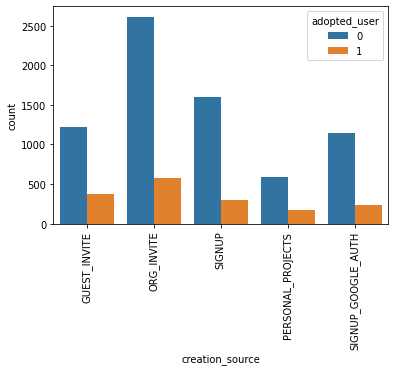

In [167]:
# Creation source and adopted user
sns.countplot(x='creation_source', data=data, hue='adopted_user')
plt.xticks(rotation=90)

In [168]:
# history and adopted user
def plot_hist_days(df, col, xlabel):
    _ = plt.hist(df.loc[data['adopted_user']==1, col], 
                 bins=30, alpha=0.3, color='b', label='adopted user')
    _ = plt.hist(df.loc[data['adopted_user']==0, col], 
                 bins=30, alpha=0.3, color='r', label='non adopted user')
    _ = plt.yscale('log')
    _ = plt.legend()
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('No. of users')
    _ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])

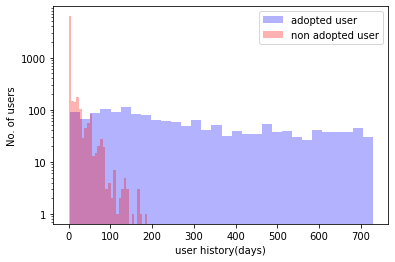

In [169]:
plot_hist_days(data, 'history', 'user history(days)')

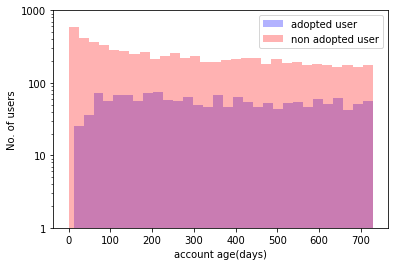

In [170]:
plot_hist_days(data, 'account_age', 'account age(days)')

In [171]:
# make dummy variable for creation source
mdata = pd.get_dummies(data, columns = ['creation_source'], drop_first=True)

In [172]:
mdata.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,history,account_age,adopted_user,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
user_id,,,,,,,,,
1,1,0,0.0,38,0,0,0,0,0
2,0,0,136.0,196,1,1,0,0,0
3,0,0,0.0,437,0,1,0,0,0
4,0,0,1.0,374,0,0,0,0,0
5,0,0,5.0,498,0,0,0,0,0


In [174]:
y = mdata['adopted_user']
X = mdata.drop('adopted_user', axis=1)

In [179]:
# create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve

In [180]:
# use random forest model with balanced class weights to correct for imbalance in the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rfc = RandomForestClassifier()
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 75)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(50, 200, num = 50)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, 
                                verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished


{'n_estimators': 398, 'max_features': 'auto', 'max_depth': 126}


In [184]:
rfc = RandomForestClassifier(n_estimators=398, max_depth=126, max_features='auto')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[1742   50]
 [  58  356]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1792
           1       0.88      0.86      0.87       414

   micro avg       0.95      0.95      0.95      2206
   macro avg       0.92      0.92      0.92      2206
weighted avg       0.95      0.95      0.95      2206



=== All AUC Scores ===
[0.99300129 0.98820806 0.97408882 0.97697484 0.98533884 0.9874435
 0.99214742 0.99158625 0.98777298 0.99171745]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9868279472168007


In [185]:
# Generate classification report
print(classification_report(y_test, rfc_predict))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, rfc_predict)*100))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1792
           1       0.88      0.86      0.87       414

   micro avg       0.95      0.95      0.95      2206
   macro avg       0.92      0.92      0.92      2206
weighted avg       0.95      0.95      0.95      2206

Test set accuracy: 95.10%


In [189]:
fi = pd.DataFrame(list(zip(X.columns, rfc.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head()

,features,Importance
2,history,0.885501
3,account_age,0.097974
0,opted_in_to_mailing_list,0.003713
1,enabled_for_marketing_drip,0.003036
4,creation_source_ORG_INVITE,0.002988


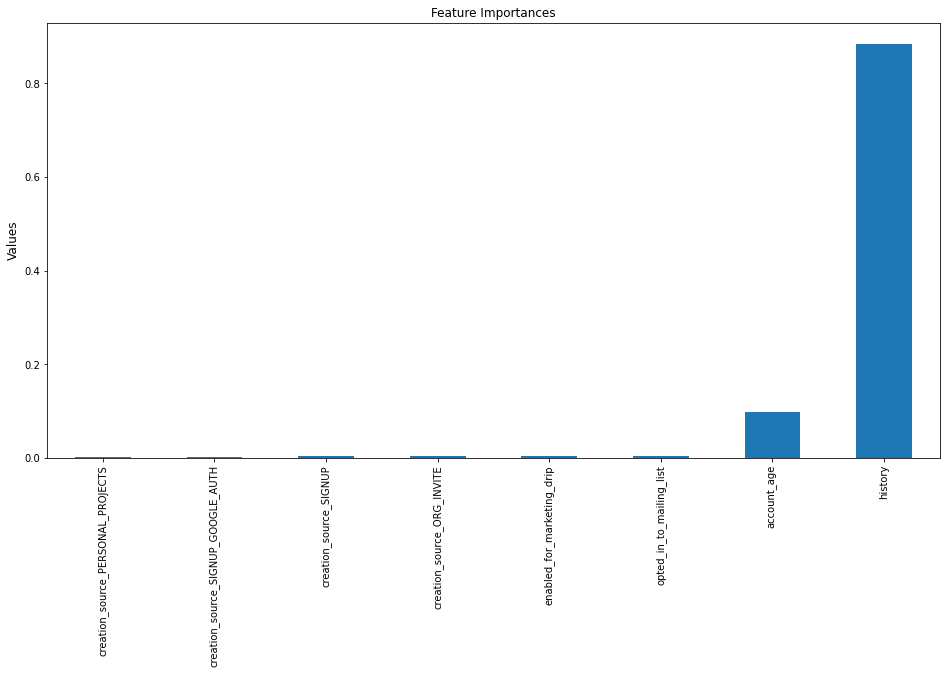

In [187]:
# Plot feature importance
feature_indices = np.argsort(rfc.feature_importances_)
li = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(rfc.feature_importances_))

ax = li.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()

Text(0.5, 1.0, 'ROC Curve')

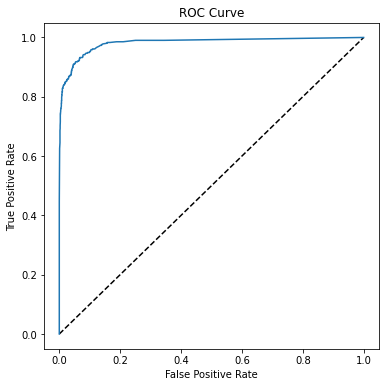

In [188]:
# Compute predicted probabilities
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

### Results - 

1. Important Features are - 
       a. history - of the users
       b. account age - from teh date user has created the account
       c. opted_in_to_mailing_list - whether they have opted into receiving marketing emails
    
2. The Performance of the model is - 
       a. Accuracy is 0.986
       b. Testset Accuracy is 95.10%



History is the most important feature, so there should be constant effort for the users to keep login in to their account use the software. User should be encouraged or feel excited to opt for receiving marking emails, reading them user can be more active and will have healthy usage of the application.
Org invite also seems to be important where user is invited to an organization (as a full member).